In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(100)

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv('C:\\Users\\chiny\Downloads\\archive.zip').set_index('id')
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     568630 

In [7]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


Text(0.5, 1.0, 'Frequency of Fraud Status')

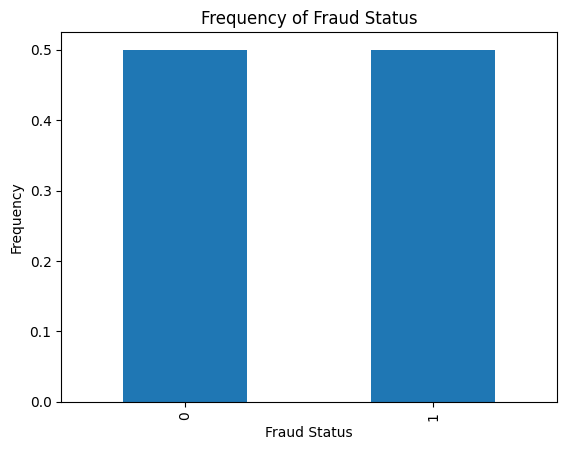

In [15]:
df['Class'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Fraud Status')
plt.title('Frequency of Fraud Status')

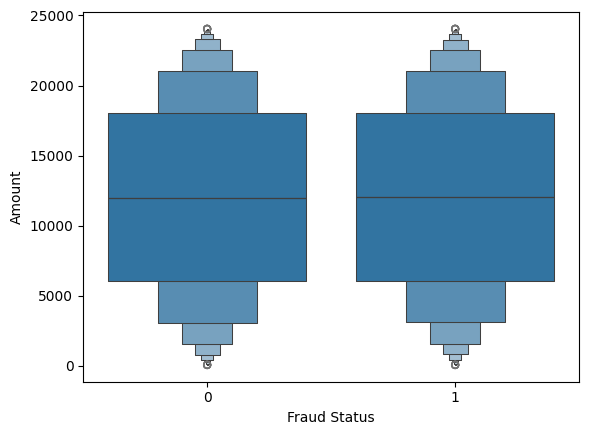

In [19]:
sns.boxenplot(df, x='Class', y='Amount')
plt.xlabel('Fraud Status')
plt.title(''); #Amount seems like a redundant feature. To be dropped in final model.

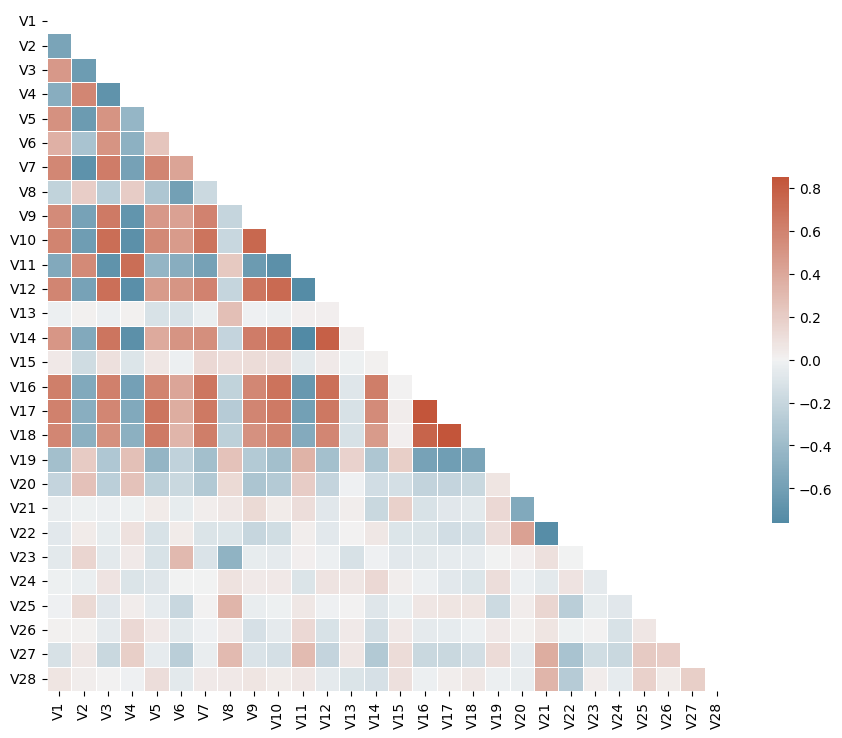

In [39]:
col_to_drop = ['Class', 'Amount']
corr = df.drop(columns=col_to_drop).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, ax=ax, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}); #High correlation between some variables noticed.

In [40]:
#Extract only highly correlated variables
threshold = 0.7

corr_pairs = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            column_name = corr.columns[i]
            corr_pairs.add(column_name)

selected_features = df[list(corr_pairs)]


In [41]:
selected_features

,V10,V14,V17,V18,V11,V22,V12
id,,,,,,,
0,0.637735,0.549020,0.512307,0.333644,-0.987020,0.217606,0.293438
1,0.529808,0.627719,0.403810,0.201799,0.140107,-0.605761,1.564246
2,0.690708,0.616874,0.886526,0.239442,-0.272985,0.702906,0.659201
3,0.575231,0.559535,0.242629,2.178616,-0.752581,-0.038212,0.737483
4,0.968046,0.241454,0.366466,0.291782,-1.203171,0.729727,1.029577
...,...,...,...,...,...,...,...
568625,-1.161847,-1.363454,-1.520928,-1.376970,1.430971,0.419731,-1.330500
568626,-0.210817,-0.812043,-0.575991,-0.664313,0.173590,0.388161,-0.539948
568627,-0.144495,-0.395126,-0.729002,-0.251679,0.477582,0.536523,-0.461849


In [42]:
corr = selected_features.corr()
corr

,V10,V14,V17,V18,V11,V22,V12
V10,1.000000,0.698939,0.649149,0.596702,-0.713066,-0.150957,0.736783
V14,0.698939,1.000000,0.552428,0.469393,-0.762322,0.052023,0.783878
V17,0.649149,0.552428,1.000000,0.851366,-0.601924,-0.144637,0.658739
V18,0.596702,0.469393,0.851366,1.000000,-0.519721,-0.135994,0.579374
V11,-0.713066,-0.762322,-0.601924,-0.519721,1.000000,0.022153,-0.744642
V22,-0.150957,0.052023,-0.144637,-0.135994,0.022153,1.000000,-0.072096
V12,0.736783,0.783878,0.658739,0.579374,-0.744642,-0.072096,1.000000


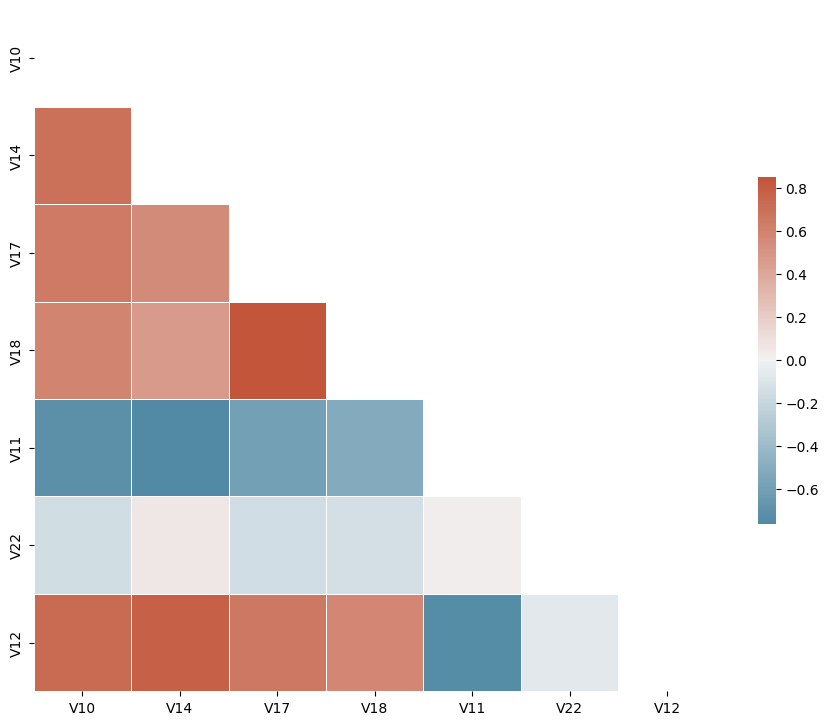

In [43]:
corr = selected_features.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, ax=ax, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [48]:
#Will check model performance with corellated variables then without
target = 'Class'
X = df.drop(columns=[target, 'Amount'])
y = df[target]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [66]:
# define model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation= "relu"))
model.add(tf.keras.layers.Dense(8, activation= "relu"))
model.add(tf.keras.layers.Dense(4, activation= "relu"))
model.add(tf.keras.layers.Dense(1))

In [67]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss = 'mae', metrics = ['mae'], optimizer = optimizer)

In [69]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
14216/14216 [==============================] - 27s 2ms/step - loss: 0.0170 - mae: 0.0170
Epoch 2/20
14216/14216 [==============================] - 27s 2ms/step - loss: 0.0132 - mae: 0.0132
Epoch 3/20
14216/14216 [==============================] - 26s 2ms/step - loss: 0.0123 - mae: 0.0123
Epoch 4/20
14216/14216 [==============================] - 27s 2ms/step - loss: 0.0115 - mae: 0.0115
Epoch 5/20
14216/14216 [==============================] - 27s 2ms/step - loss: 0.0101 - mae: 0.0101
Epoch 6/20
14216/14216 [==============================] - 28s 2ms/step - loss: 0.0098 - mae: 0.0098
Epoch 7/20
14216/14216 [==============================] - 31s 2ms/step - loss: 0.0092 - mae: 0.0092
Epoch 8/20
14216/14216 [==============================] - 35s 2ms/step - loss: 0.0084 - mae: 0.0084
Epoch 9/20
14216/14216 [==============================] - 34s 2ms/step - loss: 0.0082 - mae: 0.0082
Epoch 10/20
14216/14216 [==============================] - 35s 2ms/step - loss: 0.0087 - mae: 0.0087

In [70]:
print(model.evaluate(X_train, y_train))

14216/14216 [==============================] - 24s 2ms/step - loss: 0.0029 - mae: 0.0029
[0.002905938308686018, 0.002905938308686018]


In [71]:
pred_train = model.predict(X_train)
r2_score(y_train, pred_train)

14216/14216 [==============================] - 24s 2ms/step


0.9916436932302589